In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

sns.set()

threshold = 100.0

# Casos confirmados

## Estados Unidos

In [20]:
##################################### EXTRAÇÃO DOS DADOS

url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
data_us = pd.read_csv(url, error_bad_lines=False)

dates = data_us['date'].unique()
ndates = len(dates)
counties = data_us['county'].unique()
ncounties = len(counties)

covid_us = pd.DataFrame(np.zeros((ndates,ncounties)))
covid_us.columns = counties
covid_us.index = dates
data_us.index = data_us['date']

for index, row in data_us.iterrows():
    covid_us.at[index,row['county']] = row['cases']

###################################### DEFINIÇÃO VARIAVEIS POR CONDADO
    
ny_, la_ = covid_us['New York City'], covid_us['Los Angeles']
ny, la = ny_.loc[ny_>=threshold].reset_index(drop=True), la_.loc[la_>=threshold].reset_index(drop=True)

miami_counties = covid_us[['Miami-Dade', 'Broward', 'Palm Beach']]
mi_ = miami_counties.sum(axis=1)
mi = mi_.loc[mi_>=threshold].reset_index(drop=True)

In [21]:
def pesquisaDataEUA(data):
 
    print(data)
    print()
    print("LA : ", int(la_.loc[data]))
    print("NY : ", int(ny_.loc[data]))
    print("MI : ", int(mi_.loc[data]))


pesquisaDataEUA("2020-04-03")

2020-04-03

LA :  4566
NY :  57941
MI :  5817


## Itália

### Milão

In [22]:
################# EXTRAÇÃO DOS DADOS

url_it = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv'
data_it = pd.read_csv(url_it, error_bad_lines=False)

dates = data_it['data'].unique()
ndates = len(dates)
provs = data_it['denominazione_provincia'].unique()
nprovs = len(provs)

covid_it = pd.DataFrame(np.zeros((ndates,nprovs)))
covid_it.columns = provs
covid_it.index = dates
data_it.index = data_it['data']

for index, row in data_it.iterrows():
    covid_it.at[index,row['denominazione_provincia']] = row['totale_casi']

mil = covid_it['Milano']
mil = mil.loc[mil>=threshold].reset_index(drop=True)

### Região da Lombardia

Acabamos plotando somente a cidade de Milão, mas talvez fosse interessante utilizar a região inteira da Lombardia, que possui população mais próxima do Rio, apesar de ser uma área maior.

In [23]:
################# EXTRAÇÃO DOS DADOS

url = "https://en.wikipedia.org/wiki/Template:2019%E2%80%9320_coronavirus_pandemic_data/Italy_medical_cases"
dfs = pd.read_html(url, attrs={"class":"wikitable mw-collapsible"})
df = dfs[0]
df = df[:-7]
colunas = []

for column in df.columns:
    colunas.append(column[1])

df.columns = colunas
df.set_index("Date", inplace=True)
df.index = pd.to_datetime(df.index)
novas_colunas = df.columns[:-10]
df_new = df[novas_colunas]

# Tirando os valores entre parênteses
for column in df_new.columns:
    df_new[column] = df_new[column].str.replace(r"\(.*?\)", "")

df_new.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df_new.replace(',', '', regex=True, inplace=True)
df_new.replace('–', '', regex=True, inplace=True)
df_new.replace(' ', '', regex=True, inplace=True)
df_new = df_new.fillna(0).apply(pd.to_numeric).cumsum()

################### Definição Lombardia

lom = df_new.loc[df_new['LOM']>= threshold, 'LOM'].reset_index(drop=True)


/home/rmcnr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/rmcnr/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Espanha

In [24]:
################# EXTRAÇÃO DOS DADOS

url = 'https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos.csv'
data_spain = pd.read_csv(url, error_bad_lines=False)
data_spain.drop(data_spain.columns[[0]],axis=1,inplace=True)
data_spain = data_spain.transpose()
data_spain = data_spain.rename(columns=data_spain.iloc[0]).drop(data_spain.index[0])

################### Definição Madrid

mad = data_spain.loc[data_spain["Madrid"]>=threshold, "Madrid"].reset_index(drop=True)
#mad_ =

def pesquisaDataSPAIN(data):
 
    print(data)
    print()
    print("MA : ", int(data_spain["Madrid"][data]))


#data_spain
pesquisaDataSPAIN("2020-05-11")


2020-05-11

MA :  69801


## Brasil

### São Paulo

In [25]:
url = 'https://brasil.io/dataset/covid19/caso/?search=S%C3%A3o+Paulo&date=&state=SP&city=S%C3%A3o+Paulo&place_type=&is_last=&city_ibge_code=&order_for_place='
dfs = pd.read_html(url)
sp_total = dfs[0]
sp = sp_total.loc[sp_total["Confirmações"]>=threshold]["Confirmações"].reset_index(drop=True)
sp = sp[::-1].reset_index(drop=True)

### Rio de Janeiro

In [26]:
url = 'https://brasil.io/dataset/covid19/caso/?search=Rio+de+Janeiro&date=&state=RJ&city=Rio+de+Janeiro&place_type=&is_last=&city_ibge_code=&order_for_place='
dfs = pd.read_html(url)
rj_total = dfs[0]
rj = rj_total.loc[rj_total["Confirmações"]>=threshold]["Confirmações"].reset_index(drop=True)
rj = rj[::-1].reset_index(drop=True)

## Coreia do Sul

### Seul

In [27]:
url = 'https://en.wikipedia.org/wiki/2020_coronavirus_pandemic_in_South_Korea'
dfs = pd.read_html(url)
df = dfs[6]
df = df[:-6]
colunas = []

for column in df.columns:
    colunas.append(column[1])

df.columns = colunas

df.set_index("Date", inplace=True)

# Excluindo as anomalias da tabela 

df = df.drop(index='Date')
df.reset_index(inplace=True)
df_seoul = df["Seoul"]
df_seoul.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df_seoul.replace(',', '', regex=True, inplace=True)
df_seoul.replace('–', '', regex=True, inplace=True)
df_seoul.replace(' ', '', regex=True, inplace=True)
df_seoul.replace(r"\(.*?\)", "",regex=True,inplace=True)

seoul = df_seoul.fillna(0).apply(pd.to_numeric).cumsum()

# Dando uma divergencia de 6 casos para baixo

seoul = seoul.loc[seoul>=threshold].reset_index(drop=True)

/home/rmcnr/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##  Marcas de referência

In [28]:
start = 100
ratio = np.array([2, 2**(1/2), 2**(1/4), 2**(1/7)])
doubling_1day = [start * ratio[0]**i for i in range(14)]
doubling_2days = [start * ratio[1]**i for i in range(28)]
doubling_4days = [start * ratio[2]**i for i in range(56)]
doubling_7days = [start * ratio[3]**i for i in range(70)]

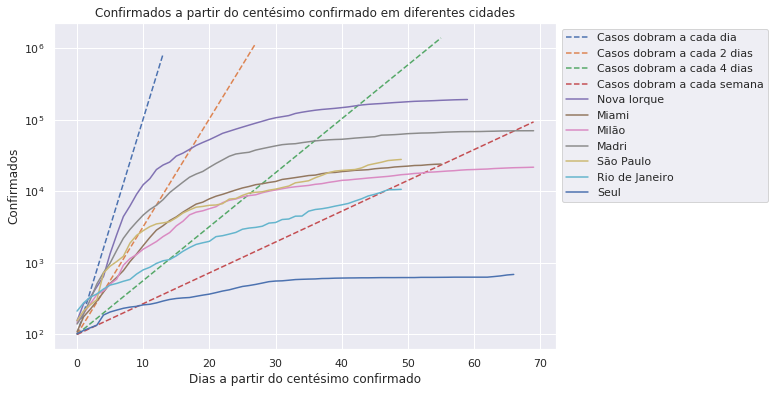

In [29]:
plt.figure(figsize=(9,6))
plt.title("Confirmados a partir do centésimo confirmado em diferentes cidades")
plt.xlabel("Dias a partir do centésimo confirmado")
plt.ylabel("Confirmados")
plt.plot(doubling_1day, '--', label = "Casos dobram a cada dia")
plt.plot(doubling_2days, '--' , label = "Casos dobram a cada 2 dias")
plt.plot(doubling_4days, '--', label = "Casos dobram a cada 4 dias")
plt.plot(doubling_7days, '--', label = "Casos dobram a cada semana")
plt.plot(ny, label='Nova Iorque')
plt.plot(mi, label='Miami')
#plt.plot(la, label='Los Angeles')
plt.plot(mil, label='Milão')
plt.plot(mad, label='Madri')
plt.plot(sp, label='São Paulo')
plt.plot(rj, label='Rio de Janeiro')
plt.plot(seoul, label='Seul')
plt.yscale('log')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()



In [30]:
#df = pd.DataFrame({"New York":ny,"Miami":mi,"Los Angeles":la,"Milão":mil,"Madrid":mad,"São Paulo":sp,"Rio de Janeiro":rj,"Seul":seoul})

In [34]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ny.index,
    y=ny,
    mode='lines',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Confirmados</b>: %{y}',
    name="Nova York"
    )
)
fig.add_trace(go.Scatter(
    x=mi.index,
    y=mi,
    mode='lines',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Confirmados</b>: %{y}',
    name="Miami"
    )
)
fig.add_trace(go.Scatter(
    x=mil.index,
    y=mil,
    mode='lines',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Confirmados</b>: %{y}',
    name="Milão"
    )
)
fig.add_trace(go.Scatter(
    x=mad.index,
    y=mad,
    mode='lines',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Confirmados</b>: %{y}',
    name="Madri"
    )
)
fig.add_trace(go.Scatter(
    x=sp.index,
    y=sp,
    mode='lines',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Confirmados</b>: %{y}',
    name="São Paulo"
    )
)
fig.add_trace(go.Scatter(
    x=rj.index,
    y=rj,
    mode='lines+markers',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Confirmados</b>: %{y}',
    name="Rio de Janeiro"
    )
)
fig.add_trace(go.Scatter(
    x=seoul.index,
    y=seoul,
    mode='lines',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Confirmados</b>: %{y}',
    name="Seul"
    )
)
fig.add_trace(go.Scatter(
    y=doubling_1day,
    mode='lines',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Confirmados</b>: %{y}',
    name="Dobra a cada dia"
    )
)
fig.add_trace(go.Scatter(
    y=doubling_2days,
    mode='lines',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Confirmados</b>: %{y}',
    name="Dobra a cada dois dias"
    )
)
fig.add_trace(go.Scatter(
    y=doubling_4days,
    mode='lines',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Confirmados</b>: %{y}',
    name="Dobra a cada quatro dias"
    )
)
fig.add_trace(go.Scatter(
    y=doubling_7days[:len(mil)+5],
    mode='lines',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Confirmados</b>: %{y}',
    name="Dobra a cada sete dias"
    )
)

fig.update_layout(title="Confirmados a partir do centésimo confirmado em diferentes cidades",
    xaxis_title="Dias após o centésimo confirmado",
    yaxis_title="Confirmados",
    width=1100,
    height=700,
    )

fig.update_yaxes(type="log")
fig.show()
fig.write_html("./plots/confirmados.html")

# Óbitos

## Estados Unidos

In [46]:
threshold_obitos = 20

##################################### EXTRAÇÃO DOS DADOS

url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
data_us = pd.read_csv(url, error_bad_lines=False)



In [47]:
dates = data_us['date'].unique()
ndates = len(dates)
counties = data_us['county'].unique()
ncounties = len(counties)

covid_us = pd.DataFrame(np.zeros((ndates,ncounties)))
covid_us.columns = counties
covid_us.index = dates
data_us.index = data_us['date']

for index, row in data_us.iterrows():
    covid_us.at[index,row['county']] = row['deaths']

###################################### DEFINIÇÃO VARIAVEIS POR CONDADO
    
ny_deaths, la_deaths = covid_us['New York City'], covid_us['Los Angeles']
ny_deaths, la_deaths = ny_deaths.loc[ny_deaths>=threshold_obitos].reset_index(drop=True), la_deaths.loc[la_deaths>=threshold_obitos].reset_index(drop=True)

mi_deaths = covid_us['Miami-Dade']
mi_deaths = mi_deaths.loc[mi_deaths>=threshold_obitos].reset_index(drop=True)

## Itália

### Milão

In [48]:
# ################# EXTRAÇÃO DOS DADOS

# url_it = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv'
# data_it = pd.read_csv(url_it, error_bad_lines=False)

# dates = data_it['data'].unique()
# ndates = len(dates)
# provs = data_it['denominazione_provincia'].unique()
# nprovs = len(provs)

# covid_it = pd.DataFrame(np.zeros((ndates,nprovs)))
# covid_it.columns = provs
# covid_it.index = dates
# data_it.index = data_it['data']

# for index, row in data_it.iterrows():
#     covid_it.at[index,row['denominazione_provincia']] = row['totale_casi']

# mil = covid_it['Milano']
# mil = mil.loc[mil>=threshold].reset_index(drop=True)

### Região da Lombardia

In [49]:
################# EXTRAÇÃO DOS DADOS
import re
url = "https://en.wikipedia.org/wiki/Template:2019%E2%80%9320_coronavirus_pandemic_data/Italy_medical_cases"
dfs = pd.read_html(url, attrs={"class":"wikitable mw-collapsible"})
df = dfs[0]
df = df[:-7]
colunas = []

for column in df.columns:
    colunas.append(column[1])

df.columns = colunas
df.set_index("Date", inplace=True)
df.index = pd.to_datetime(df.index)
novas_colunas = df.columns[:-10]
df_new = df[novas_colunas]

# Tirando os valores entre parênteses

lom = df_new["LOM"].loc[df_new["LOM"].str.contains("(",case=False, na=False, regex=False)]
lom_deaths = []

for string in lom:
    x = re.findall(r'\((.*?)\)', string)
    lom_deaths.append(x[0])

lom_deaths = pd.DataFrame({"Lom_deaths":lom_deaths})
lom_deaths = lom_deaths.apply(pd.to_numeric).cumsum()
lom_deaths = lom_deaths["Lom_deaths"]
lom_deaths = lom_deaths[lom_deaths>=threshold_obitos].reset_index(drop=True)

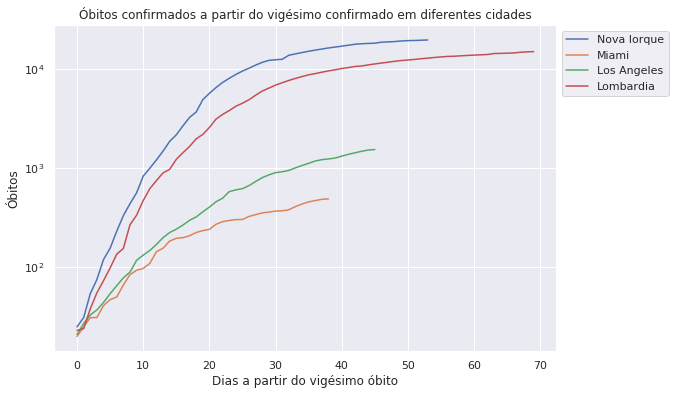

In [50]:
plt.figure(figsize=(9,6))
plt.title("Óbitos confirmados a partir do vigésimo confirmado em diferentes cidades")
plt.xlabel("Dias a partir do vigésimo óbito")
plt.ylabel("Óbitos")
#plt.plot(doubling_1day, '--', label = "Casos dobram a cada dia")
#plt.plot(doubling_2days, '--' , label = "Casos dobram a cada 2 dias")
#plt.plot(doubling_4days, '--', label = "Casos dobram a cada 4 dias")
#plt.plot(doubling_7days, '--', label = "Casos dobram a cada semana")
plt.plot(ny_deaths, label='Nova Iorque')
plt.plot(mi_deaths, label='Miami')
plt.plot(la_deaths, label='Los Angeles')
plt.plot(lom_deaths, label='Lombardia')
#plt.plot(mad, label='Madri')
#plt.plot(sp, label='São Paulo')
#plt.plot(rj, label='Rio de Janeiro')
#plt.plot(seoul, label='Seul')
plt.yscale('log')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.show()

In [51]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ny_deaths.index,
    y=ny_deaths,
    mode='lines',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Óbitos</b>: %{y}',
    name="Nova York"
    )
)
fig.add_trace(go.Scatter(
    x=mi_deaths.index,
    y=mi_deaths,
    mode='lines',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Óbitos</b>: %{y}',
    name="Miami"
    )
)
fig.add_trace(go.Scatter(
    x=la_deaths.index,
    y=la_deaths,
    mode='lines',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Óbitos</b>: %{y}',
    name="Los Angeles"
    )
)
fig.add_trace(go.Scatter(
    x=lom_deaths.index,
    y=lom_deaths,
    mode='lines',
    hovertemplate = '<br><b>Dias</b>: %{x}<br>'
                    '<br><b>Óbitos</b>: %{y}',
    name="Lombardia"
    )
)

# fig.add_trace(go.Scatter(
#     y=doubling_1day,
#     mode='lines',
#     hovertemplate = '<br><b>Dias</b>: %{x}<br>'
#                     '<br><b>Confirmados</b>: %{y}',
#     name="Dobra a cada dia"
#     )
# )
# fig.add_trace(go.Scatter(
#     y=doubling_2days,
#     mode='lines',
#     hovertemplate = '<br><b>Dias</b>: %{x}<br>'
#                     '<br><b>Confirmados</b>: %{y}',
#     name="Dobra a cada dois dias"
#     )
# )
# fig.add_trace(go.Scatter(
#     y=doubling_4days,
#     mode='lines',
#     hovertemplate = '<br><b>Dias</b>: %{x}<br>'
#                     '<br><b>Confirmados</b>: %{y}',
#     name="Dobra a cada quatro dias"
#     )
# )
# fig.add_trace(go.Scatter(
#     y=doubling_7days[:len(mil)+5],
#     mode='lines',
#     hovertemplate = '<br><b>Dias</b>: %{x}<br>'
#                     '<br><b>Confirmados</b>: %{y}',
#     name="Dobra a cada sete dias"
#     )
# )

fig.update_layout(title="Óbitos confirmados a partir do vigésimo confirmado em diferentes cidades",
    xaxis_title="Dias após o vigésimo óbito",
    yaxis_title="Confirmados",
    width=1000,
    height=700,
    )

fig.update_yaxes(type="log")
fig.show()
fig.write_html("./plots/obitos.html")